# Market basket analysis

The project concerns market basket analysis and product recomendation by using the Apriori algorithm (association method). We used 'Online Retail' data for analysis. 

Market basket analysis is a technique that allow us to discover the relatonships between products. It is based on searching for the most common combination of products in each transaction. Each transaction consist from n number of products and it is called as basket. We are looking for of such transactions that occurs frequently with each other. In our analysis we use the Apriori algorithm and the main goal is to sorting the products and creating the best relationship. We use MLxtend library  to create the basket analysis.


### Dataset information:

The dataset comes from UCI data collection and can be found here: https://www.kaggle.com/puneetbhaya/online-retail. 
The data contain all the transactions occurring between 01/12/2010 and 09/12/2011 for a store online retail. The company mainly sells unique all-occasion gifts an many customers of the company are wholesalers.

**Attributes:**

- InvoiceNo: A unique identifier for the invoice assigned to each transaction. Code 'C' indicates a cancellation. 
- StockCode: Identifier for items contained in an invoice.
- Description: Name of each product (item).
- Quantity: The quantity of each product per transaction.
- InvoiceDate: Date of purchase.
- UnitPrice: Value of each item (product price).
- CustomerID: Unique number assigned to each customer making the purchase.
- Country: Country of customer.

### Import libriaries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df = pd.read_csv(r'C:\Python Scripts\Datasets\online_retail.csv', encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**First observations:**

In [3]:
print('Shape of data:\n', df.shape)

Shape of data:
 (541909, 8)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Checking the missing values in data:

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Number of unique values in each variable:

In [6]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## Data pre-processing

There are some invoices that are ‘credits’ rather of ‘debits’ so we remove them. They are indentified with “C” in the InvoiceNo field. The example of these types of invoices with the following:

In [7]:
df[df['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


Removing these rows:

In [8]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [9]:
df = df[~df['InvoiceNo'].str.contains('C',na=False)]

In [10]:
df['InvoiceNo']

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 532621, dtype: object

We are filling the missing values in CostumerID and Description variables:

In [11]:
df["CustomerID"] = df["CustomerID"].fillna('00000')
df["Description"] = df["Description"].fillna("Unkown")

#### Feature engneering

We add column with an year, month and hour of each transaction:

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Hour'] = df['InvoiceDate'].dt.hour

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,8


In [14]:
df['Month_year'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,8,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,8,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,8,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,8,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,8,2010-12


We count the income (revenues):

We assigns the product of quantity and price to the Income column and we use round function to rounding the two decimal places. We receive revenues for every product.

In [15]:
df['Income'] = round(df['Quantity'] * df['UnitPrice'],2)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Month_year,Income
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,8,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,8,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,8,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,8,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,8,2010-12,20.34


## Exploratory Data Analysis (EDA)

### Summary statistic:

In [16]:
df.describe()

,Quantity,UnitPrice,Year,Month,Hour,Income
count,532621.000000,532621.000000,532621.000000,532621.000000,532621.000000,532621.000000
mean,10.239972,3.847621,2010.921608,7.557864,13.077451,19.985244
std,159.593551,41.758023,0.268787,3.508729,2.438535,270.574241
min,-9600.000000,-11062.060000,2010.000000,1.000000,6.000000,-11062.060000
25%,1.000000,1.250000,2011.000000,5.000000,11.000000,3.750000
50%,3.000000,2.080000,2011.000000,8.000000,13.000000,9.900000
75%,10.000000,4.130000,2011.000000,11.000000,15.000000,17.700000
max,80995.000000,13541.330000,2011.000000,12.000000,20.000000,168469.600000


From the previous result we see that Quantity and UnitPrice have negative values which could mean that data may also have reverse transactions. Let's check if there are records where both are negative or if one of them is negative and the other is zero.

In [17]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Month_year,Income
2406,536589,21777,Unkown,-10,2010-12-01 16:50:00,0.0,00000,United Kingdom,2010,12,16,2010-12,-0.0
4347,536764,84952C,Unkown,-38,2010-12-02 14:42:00,0.0,00000,United Kingdom,2010,12,14,2010-12,-0.0
7188,536996,22712,Unkown,-20,2010-12-03 15:30:00,0.0,00000,United Kingdom,2010,12,15,2010-12,-0.0
7189,536997,22028,Unkown,-20,2010-12-03 15:30:00,0.0,00000,United Kingdom,2010,12,15,2010-12,-0.0
7190,536998,85067,Unkown,-6,2010-12-03 15:30:00,0.0,00000,United Kingdom,2010,12,15,2010-12,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,00000,United Kingdom,2011,12,18,2011-12,-0.0
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,00000,United Kingdom,2011,12,18,2011-12,-0.0
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,00000,United Kingdom,2011,12,18,2011-12,-0.0
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,00000,United Kingdom,2011,12,9,2011-12,-0.0


There are no records where quantity and price are negative but there are 1.336 records where one is negative and the other is 0. There is no customer ID for all of these records and we can ignore this in our analysis.

### Exploring the variables
Lets check the values in other columns:

**Quantity**

The quantity above 100:

In [18]:
df[df['Quantity']>100].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Month_year,Income
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,2010,12,9,2010-12,50.40
178,536387,79321,CHILLI LIGHTS,192,2010-12-01 09:58:00,3.82,16029,United Kingdom,2010,12,9,2010-12,733.44
179,536387,22780,LIGHT GARLAND BUTTERFILES PINK,192,2010-12-01 09:58:00,3.37,16029,United Kingdom,2010,12,9,2010-12,647.04
180,536387,22779,WOODEN OWLS LIGHT GARLAND,192,2010-12-01 09:58:00,3.37,16029,United Kingdom,2010,12,9,2010-12,647.04
181,536387,22466,FAIRY TALE COTTAGE NIGHTLIGHT,432,2010-12-01 09:58:00,1.45,16029,United Kingdom,2010,12,9,2010-12,626.40


We check the quantity of ordered products:

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


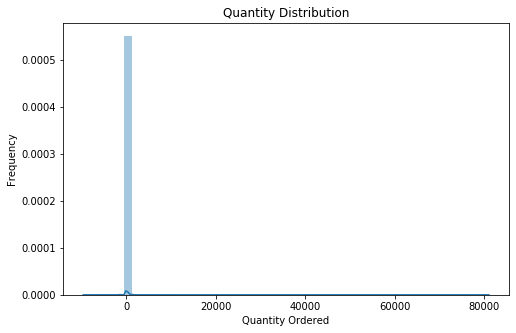

In [19]:
plt.figure(figsize=(8,5))
sns.distplot(df['Quantity'])
plt.title('Quantity Distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show();

As one can see outliers have appeared. Then we can check the percentiles:

In [20]:
df[df['Quantity'] > 70000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Month_year,Income
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,2011,1,10,2011-01,77183.6
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,2011,12,9,2011-12,168469.6


In [21]:
{
    'prct99.9': np.percentile(df['Quantity'], 99.9),
    'prct99': np.percentile(df['Quantity'], 99),
    'prct90': np.percentile(df['Quantity'], 90),
    'prct80': np.percentile(df['Quantity'], 80),
    'prct70': np.percentile(df['Quantity'], 70),
    'prct50': np.percentile(df['Quantity'], 50),
}

{'prct99.9': 480.0,
 'prct99': 100.0,
 'prct90': 24.0,
 'prct80': 12.0,
 'prct70': 8.0,
 'prct50': 3.0}

There are 99% of the same products are between 1-100.

**UnitPrice**

Price of products ordered by customers:

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


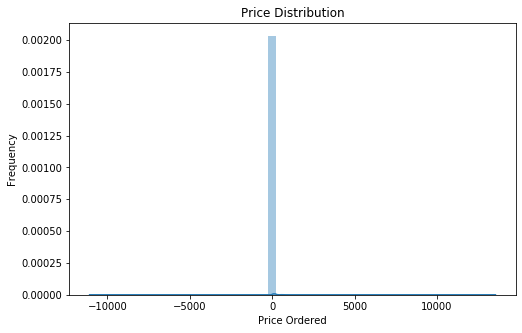

In [23]:
plt.figure(figsize=(8,5))
sns.distplot(df['UnitPrice'])
plt.title('Price Distribution')
plt.xlabel('Price Ordered')
plt.ylabel('Frequency')
plt.show()

From the distribution plot of prices that majority products are in the range of low prices.

**StockCode**

Numbers of unique products:

In [24]:
products = df['StockCode'].nunique()
print(products)

4059


Number of unique products ordered by customers:

In [25]:
products_group = df[['CustomerID', 'StockCode']].groupby('CustomerID').count().sort_values('StockCode', axis=0, ascending=False)
products_group.head(10)

,StockCode
CustomerID,
00000,134697
17841.0,7847
14911.0,5677
14096.0,5111
12748.0,4596
14606.0,2700
15311.0,2379
14646.0,2080
13089.0,1818


**Country**

List of unique countries:

In [26]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

Let's check what was ordered from Poland:

In [27]:
df[df['Country']=='Poland'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Month_year,Income
6608,536971,21733,RED HANGING HEART T-LIGHT HOLDER,32,2010-12-03 13:40:00,2.55,12779,Poland,2010,12,13,2010-12,81.60
6609,536971,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2010-12-03 13:40:00,1.25,12779,Poland,2010,12,13,2010-12,30.00
6610,536971,37446,MINI CAKE STAND WITH HANGING CAKES,8,2010-12-03 13:40:00,1.45,12779,Poland,2010,12,13,2010-12,11.60
6611,536971,37448,CERAMIC CAKE DESIGN SPOTTED MUG,24,2010-12-03 13:40:00,1.49,12779,Poland,2010,12,13,2010-12,35.76
6612,536971,21700,BIG DOUGHNUT FRIDGE MAGNETS,24,2010-12-03 13:40:00,0.85,12779,Poland,2010,12,13,2010-12,20.40


**InvoiceNo**

Number of unique orders:

In [28]:
df['InvoiceNo'].nunique()

22064

Number of unique orders by country:

In [29]:
country_group = df[['Country', 'InvoiceNo']].groupby('Country').count().sort_values('InvoiceNo', axis=0, ascending=False)
country_group 

,InvoiceNo
Country,
United Kingdom,487622
Germany,9042
France,8408
EIRE,7894
Spain,2485
Netherlands,2363
Belgium,2031
Switzerland,1967
Portugal,1501


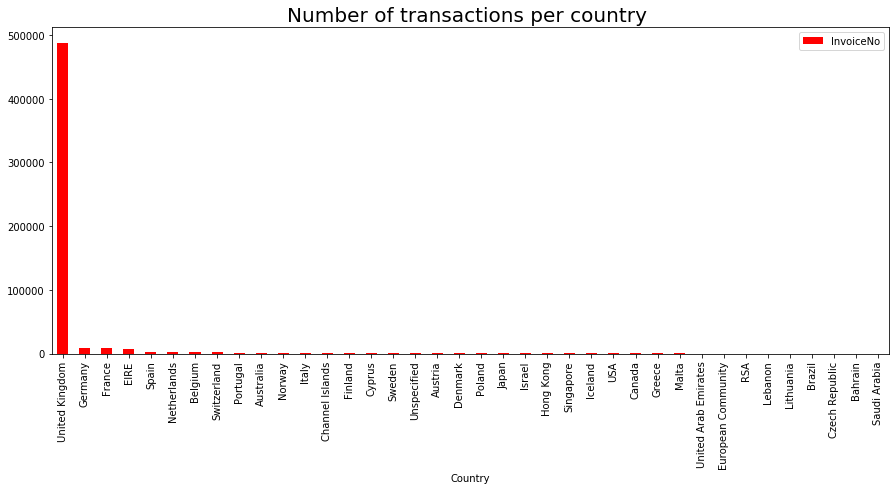

In [30]:
plt.rcParams['figure.figsize'] = (15, 6)
color = plt.cm.magma(np.linspace(0, 1, 40))
country_group.plot.bar(color = 'red')
plt.title('Number of transactions per country ', fontsize=20)
plt.xticks(rotation=90)
plt.show()

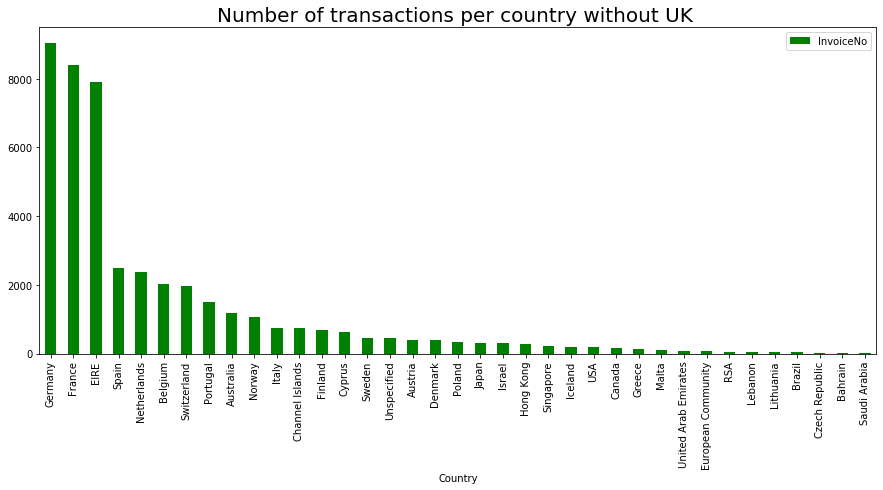

In [31]:
plt.rcParams['figure.figsize'] = (15, 6)
color = plt.cm.magma(np.linspace(0, 1, 40))
country_group[country_group.index != 'United Kingdom'].plot.bar(color='green')
plt.title('Number of transactions per country without UK ', fontsize=20)
plt.xticks(rotation =90)
plt.show()

From diagrams that the most customers comes from United Kingdom - almost 500 000 orders. The rest of the world have much fewer orders. The most comes from Germany and France.

**Description**

Descriptions of products:

In [32]:
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

How are the most popular products?

In [33]:
df['Description'].value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
ASSORTED COLOUR BIRD ORNAMENT         1489
Unkown                                1454
SET OF 3 CAKE TINS PANTRY DESIGN      1399
PACK OF 72 RETROSPOT CAKE CASES       1370
LUNCH BAG  BLACK SKULL.               1328
Name: Description, dtype: int64

In [34]:
df[df['Description']=='WHITE HANGING HEART T-LIGHT HOLDER'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Month_year,Income
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,8,2010-12,15.3
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850,United Kingdom,2010,12,9,2010-12,15.3
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850,United Kingdom,2010,12,9,2010-12,15.3
220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511,United Kingdom,2010,12,10,2010-12,163.2
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408,United Kingdom,2010,12,10,2010-12,81.6


In [83]:
desc = df['Description'].value_counts().head(20)

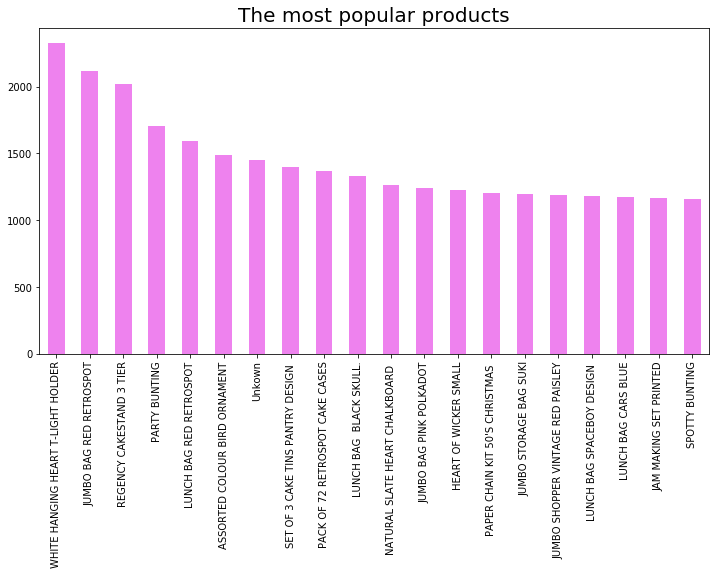

In [84]:
plt.rcParams['figure.figsize']=(12, 6)
color = plt.cm.magma(np.linspace(0, 1, 40))
desc.plot.bar(color='violet')
plt.title('The most popular products', fontsize=20)
plt.xticks(rotation=90)
plt.show()

The most popular product is WHITE HANGING HEART T-LIGHT HOLDER. 

**CustomerID**

The number of unique customers:

In [37]:
df['CustomerID'].nunique()  

4340

Checking there are unknown customers?

In [38]:
df[df['CustomerID'] == '00000'].head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Month_year,Income
622,536414,22139,Unkown,56,2010-12-01 11:52:00,0.00,00000,United Kingdom,2010,12,11,2010-12,0.00
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,00000,United Kingdom,2010,12,14,2010-12,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,00000,United Kingdom,2010,12,14,2010-12,5.02
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,00000,United Kingdom,2010,12,14,2010-12,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,00000,United Kingdom,2010,12,14,2010-12,3.32


The customers who generated the most ordered:

In [39]:
customer_group = df[['CustomerID', 'InvoiceNo']].groupby('CustomerID').count().sort_values('InvoiceNo', axis=0, ascending=False)
customer_group.head(10)

,InvoiceNo
CustomerID,
00000,134697
17841.0,7847
14911.0,5677
14096.0,5111
12748.0,4596
14606.0,2700
15311.0,2379
14646.0,2080
13089.0,1818


In data the most customers are unknown but there is customer number 17841 who made 7847 orders.

## Analyzing KPIs

We check which country generates the most sales revenues:

In [40]:
df.groupby('Country')['Income'].sum().sort_values(ascending=False).head(10)

Country
United Kingdom    9.003098e+06
Netherlands       2.854463e+05
EIRE              2.834540e+05
Germany           2.288671e+05
France            2.097151e+05
Australia         1.385213e+05
Spain             6.157711e+04
Switzerland       5.708990e+04
Belgium           4.119634e+04
Sweden            3.837833e+04
Name: Income, dtype: float64

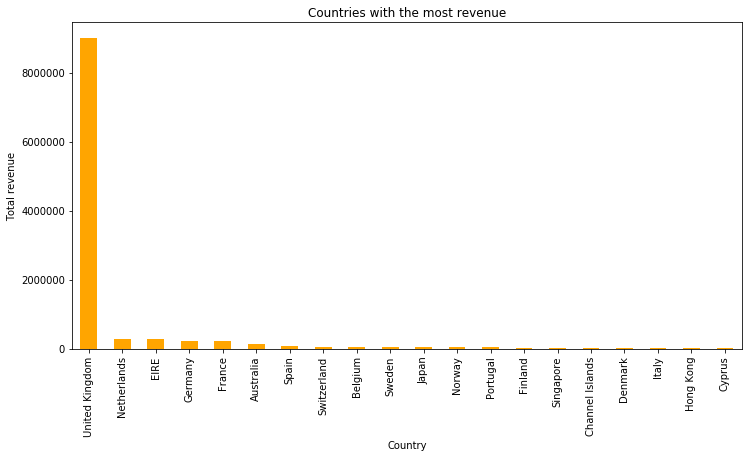

In [41]:
plt.figure(figsize=(12,6))
cities = df.groupby('Country')['Income'].sum().sort_values(ascending=False).head(20)
cities.plot(kind = 'bar', color='orange')
plt.title('Countries with the most revenue')
plt.xlabel('Country')
plt.ylabel('Total revenue')
plt.show()

The most revenues comes from UK. 

Which products generates the most sales revenues:

In [42]:
df.groupby('Description')['Income'].sum().sort_values(ascending=False).head(10)

Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174484.74
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106292.77
PARTY BUNTING                          99504.33
JUMBO BAG RED RETROSPOT                94340.05
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
Manual                                 78112.82
POSTAGE                                78101.88
RABBIT NIGHT LIGHT                     66964.99
Name: Income, dtype: float64

The most revenue is generated by the DOTCOM POSTAGE and REGENCY CAKESTAND 3 TIER products.

### Annual Revenue

In [43]:
df.groupby(['Year'])['Income'].sum()

Year
2010    8.237461e+05
2011    9.820814e+06
Name: Income, dtype: float64

The annual revenue in 2011 wa higher than 2010.

**Monthly Revenue**

We compile the revenues from month to month:

In [44]:
df.groupby(['Month_year'])['Income'].sum()

Month_year
2010-12     823746.14
2011-01     691364.56
2011-02     523631.89
2011-03     717639.36
2011-04     537808.62
2011-05     770536.02
2011-06     761739.90
2011-07     719221.19
2011-08     737014.26
2011-09    1058590.17
2011-10    1154979.30
2011-11    1509496.33
2011-12     638792.68
Freq: M, Name: Income, dtype: float64

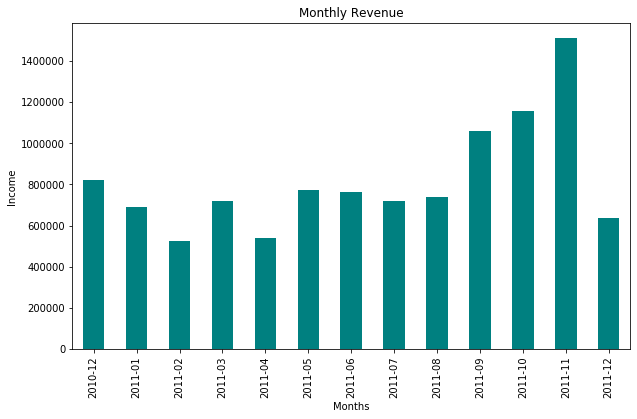

In [50]:
plt.figure(figsize=(10,6))
df.groupby(['Month_year'])['Income'].sum().plot(kind='bar', color='teal');
plt.title('Monthly Revenue')
plt.xlabel('Months')
plt.ylabel('Income')
plt.show()

In [48]:
month = df.groupby(['Month_year'])['Income'].sum()

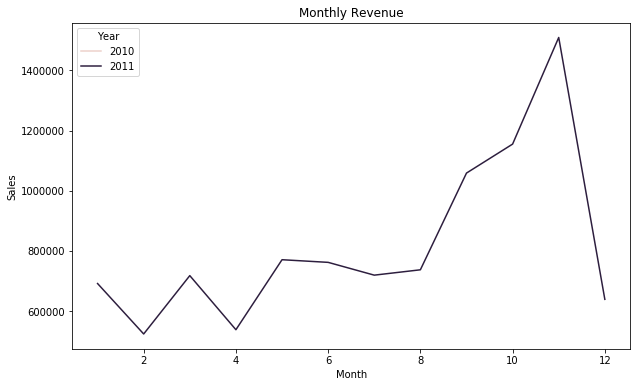

In [49]:
plt.figure(figsize=(10,6))
monthly_revenue = df.groupby(["Year", "Month"])["Income"].sum().reset_index()
monthly_revenue
sns.lineplot(x="Month", y="Income",hue="Year", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Revenue')
plt.show()

The revenue is growing especially from September to  November. It can be the result of the seasonality (Thanks Giving and other festivitues). The november 2011 was obtained the most revenues. We can also observe that in december 2010 was better than december 2011 in terms of generated revenues.

**Revenues of Customers**

We check how many revenues generated individual customers. Average revenue of individual clients:

In [51]:
cust = df[['CustomerID','Income']].groupby('CustomerID').mean().sort_values('Income', ascending=False).head(10)
cust

,Income
CustomerID,
12346.0,77183.600000
16446.0,56157.500000
15098.0,13305.500000
15749.0,4453.430000
15195.0,3861.000000
13135.0,3096.000000
17846.0,2033.100000
18087.0,2027.860000
16532.0,1687.200000


<Figure size 720x432 with 0 Axes>

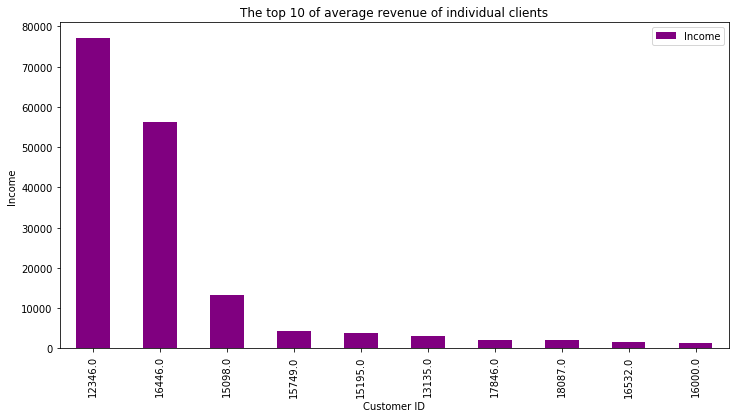

In [85]:
plt.figure(figsize=(10,6))
cust.plot(kind='bar', color='purple');
plt.title('The top 10 of average revenue of individual clients')
plt.xlabel('Customer ID')
plt.ylabel('Income')
plt.show();

**Monthly Active Customers**

The average monthly customer activity:

In [55]:
monthly_active = df.groupby(['Month_year'])['CustomerID'].nunique().reset_index()
monthly_active

,Month_year,CustomerID
0,2010-12,886
1,2011-01,742
2,2011-02,759
3,2011-03,975
4,2011-04,857
5,2011-05,1057
6,2011-06,992
7,2011-07,950
8,2011-08,936
9,2011-09,1267


<Figure size 720x360 with 0 Axes>

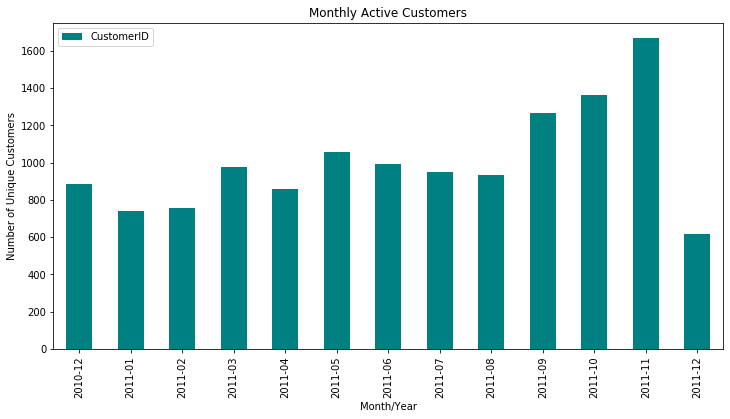

In [61]:
plt.figure(figsize=(10,5))
monthly_active.plot(kind='bar',x='Month_year',y='CustomerID', color='teal')
plt.title('Monthly Active Customers')
plt.xlabel('Month/Year')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=90)
plt.show();

As expected customers are highly active during the months from September to November. 

**Hourly sales**

We check the number of unique transactions during which the store has the most sales:

In [58]:
df.groupby('Hour')['InvoiceNo'].nunique()

Hour
6        1
7       29
8      570
9     1590
10    2564
11    2642
12    3464
13    2939
14    2737
15    2668
16    1552
17     901
18     244
19     146
20      18
Name: InvoiceNo, dtype: int64

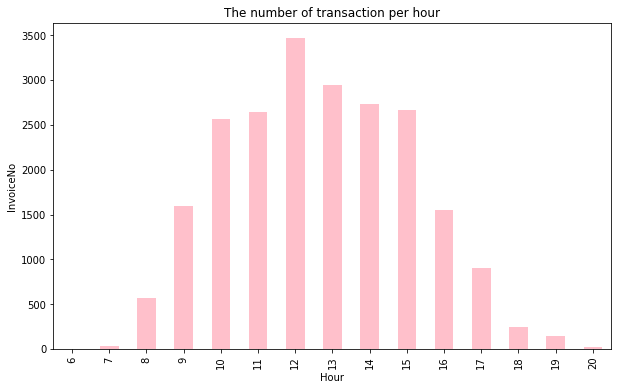

In [60]:
plt.figure(figsize=(10,6))
df.groupby('Hour')['InvoiceNo'].nunique().plot(kind='bar', color='pink')
plt.title('The number of transaction per hour')
plt.xlabel('Hour')
plt.ylabel('InvoiceNo')
plt.show();

From the diagram above we can see that the at 12 o'clock the biggest sale is recorded.

## Basket analysis using Apriori algorithm:

The Apriori algorithm is one of the most common techniques in Market Basket Analysis. It is used to analyze the frequent itemsets in a transactional database, which then is used to generate association rules between the products. The association rules exploration is based on the idea that the purchasing behavior of customers follows a pattern that can be used to sell more products to the customer in the future.

##### Main Concepts of Association Rules / Apriori Algorithm:

**Support** is an indication of how frequently the itemset appears in the dataset. This is an indication of how popular an itemset is in a dataset.

**Confidence** is a measure of the reliability of the rule. Is an indication of how often the rule has been found to be true. It can be said confidence says how likely item Y is purchased when item X is purchased.

**Lift** shows how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is.  In practice means is a lift value close to 1 means the rules were completely independent. Lift values > 1 are generally more “interesting” and could be indicative of a useful rule pattern. 


For further analysis, we choose transactions from only one country - Netherlands: 

In [16]:
data = df[df['Country'] == 'Netherlands']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Month_year,Income
385,536403,22867,HAND WARMER BIRD DESIGN,96,2010-12-01 11:27:00,1.85,12791,Netherlands,2010,12,11,2010-12,177.60
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791,Netherlands,2010,12,11,2010-12,15.00
37952,539491,21981,PACK OF 12 WOODLAND TISSUES,12,2010-12-20 10:09:00,0.29,14646,Netherlands,2010,12,10,2010-12,3.48
37953,539491,21986,PACK OF 12 PINK POLKADOT TISSUES,12,2010-12-20 10:09:00,0.29,14646,Netherlands,2010,12,10,2010-12,3.48
37954,539491,22720,SET OF 3 CAKE TINS PANTRY DESIGN,2,2010-12-20 10:09:00,4.95,14646,Netherlands,2010,12,10,2010-12,9.90


We modify the table with data in such a way that each transaction is written in one line:

In [17]:
basket = data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
basket

Description,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,16 PIECE CUTLERY SET PANTRY DESIGN,...,WRAP RED APPLES,WRAP WEDDING DAY,YELLOW METAL CHICKEN HEART,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,192.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578143,0.0,0.0,0.0,0.0,0.0,384.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
579528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next we modify the table in such a way that the presence of a product in the basket means '1'  and the lack of a product means '0':

In [18]:
basket_model = basket.applymap(lambda x: 1 if x>0 else 0)
basket_model

Description,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,16 PIECE CUTLERY SET PANTRY DESIGN,...,WRAP RED APPLES,WRAP WEDDING DAY,YELLOW METAL CHICKEN HEART,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539731,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
541206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578143,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
579528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The most widely used library for Association Rules Learning implementations is Mlxtend so we are using that library as well.

Firstly we import Apriori algorithm and exclude products that are rare. We set the minimum support below which we cut off data from the analysis and what remains we analyze further. The support means a frequency of each product in the basket. Support is defined as the percentage of time a feature set appears in the dataset. Setting the support level high can lead to very few (or no) results and setting it too low can require a huge amount of memory to process data.

In this case we set 'min_support' on 0,07.

In [19]:
popular_sets = apriori(basket_model, min_support=0.07, use_colnames=True)

In [20]:
popular_sets

,support,itemsets
0,0.073684,(3 HOOK HANGER MAGIC GARDEN)
1,0.073684,(36 FOIL HEART CAKE CASES)
2,0.073684,(5 HOOK HANGER RED MAGIC TOADSTOOL)
3,0.105263,(72 SWEETHEART FAIRY CAKE CASES)
4,0.073684,(BREAD BIN DINER STYLE PINK)
...,...,...
426,0.073684,"(ROUND SNACK BOXES SET OF 4 FRUITS , SPACEBOY ..."
427,0.073684,"(ROUND SNACK BOXES SET OF 4 FRUITS , SPACEBOY ..."
428,0.073684,"(ROUND SNACK BOXES SET OF4 WOODLAND , LUNCH BA..."
429,0.073684,"(RED RETROSPOT CHARLOTTE BAG, ROUND SNACK BOXE..."


The last step is to build association rules using the mxltend Associations_rules function. One can set a metric ( lift or confidence) and a minimum threshold for the confidence level (min_threshold). „Min_threshold” can be taken as the percentage of confidence we want to return. For example if we set "min_threshold" to 1, we only get the rules with 100% certainty.

In [21]:
rules = association_rules(popular_sets,metric='lift',min_threshold=1)

In [22]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(DOLLY GIRL LUNCH BOX),(72 SWEETHEART FAIRY CAKE CASES),0.231579,0.105263,0.094737,0.409091,3.886364,0.070360,1.514170
1,(72 SWEETHEART FAIRY CAKE CASES),(DOLLY GIRL LUNCH BOX),0.105263,0.231579,0.094737,0.900000,3.886364,0.070360,7.684211
2,(ROUND SNACK BOXES SET OF 4 FRUITS ),(72 SWEETHEART FAIRY CAKE CASES),0.178947,0.105263,0.073684,0.411765,3.911765,0.054848,1.521053
3,(72 SWEETHEART FAIRY CAKE CASES),(ROUND SNACK BOXES SET OF 4 FRUITS ),0.105263,0.178947,0.073684,0.700000,3.911765,0.054848,2.736842
4,(72 SWEETHEART FAIRY CAKE CASES),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.105263,0.263158,0.073684,0.700000,2.660000,0.045983,2.456140
5,(ROUND SNACK BOXES SET OF4 WOODLAND ),(72 SWEETHEART FAIRY CAKE CASES),0.263158,0.105263,0.073684,0.280000,2.660000,0.045983,1.242690
6,(SPACEBOY LUNCH BOX ),(72 SWEETHEART FAIRY CAKE CASES),0.294737,0.105263,0.094737,0.321429,3.053571,0.063712,1.318560
7,(72 SWEETHEART FAIRY CAKE CASES),(SPACEBOY LUNCH BOX ),0.105263,0.294737,0.094737,0.900000,3.053571,0.063712,7.052632
8,(CARD BIRTHDAY COWBOY),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.094737,0.263158,0.073684,0.777778,2.955556,0.048753,3.315789
9,(ROUND SNACK BOXES SET OF4 WOODLAND ),(CARD BIRTHDAY COWBOY),0.263158,0.094737,0.073684,0.280000,2.955556,0.048753,1.257310


There are quite a few rules with a high lift value which means that it occurs more frequently and the several where the confidence is high as well. 

### Recommendations

The top 20 most popular related products by measure of height (lift):

In [23]:
rules.sort_values('lift', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1772,"(PLASTERS IN TIN SPACEBOY, COWBOYS AND INDIANS...","(SPACEBOY BIRTHDAY CARD, LUNCH BAG RED RETROSP...",0.073684,0.084211,0.073684,1.000000,11.875000,0.067479,inf
1758,"(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ...","(SPACEBOY BIRTHDAY CARD, LUNCH BAG RED RETROSPOT)",0.073684,0.084211,0.073684,1.000000,11.875000,0.067479,inf
1753,"(SPACEBOY BIRTHDAY CARD, LUNCH BAG RED RETROSP...","(PLASTERS IN TIN SPACEBOY, COWBOYS AND INDIANS...",0.084211,0.073684,0.073684,0.875000,11.875000,0.067479,7.410526
228,(PACK OF 6 SKULL PAPER CUPS),(PACK OF 20 SKULL PAPER NAPKINS),0.084211,0.073684,0.073684,0.875000,11.875000,0.067479,7.410526
229,(PACK OF 20 SKULL PAPER NAPKINS),(PACK OF 6 SKULL PAPER CUPS),0.073684,0.084211,0.073684,1.000000,11.875000,0.067479,inf
1767,"(SPACEBOY BIRTHDAY CARD, LUNCH BAG RED RETROSPOT)","(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ...",0.084211,0.073684,0.073684,0.875000,11.875000,0.067479,7.410526
1263,"(SPACEBOY BIRTHDAY CARD, LUNCH BAG RED RETROSPOT)","(PLASTERS IN TIN SPACEBOY, COWBOYS AND INDIANS...",0.084211,0.073684,0.073684,0.875000,11.875000,0.067479,7.410526
1266,"(PLASTERS IN TIN SPACEBOY, COWBOYS AND INDIANS...","(SPACEBOY BIRTHDAY CARD, LUNCH BAG RED RETROSPOT)",0.073684,0.084211,0.073684,1.000000,11.875000,0.067479,inf
1783,"(RED RETROSPOT CHARLOTTE BAG, SPACEBOY LUNCH B...","(DOLLY GIRL LUNCH BOX, PLASTERS IN TIN VINTAGE...",0.094737,0.073684,0.073684,0.777778,10.555556,0.066704,4.168421
1377,"(DOLLY GIRL LUNCH BOX, PLASTERS IN TIN VINTAGE...","(RED RETROSPOT CHARLOTTE BAG, SPACEBOY LUNCH B...",0.073684,0.094737,0.073684,1.000000,10.555556,0.066704,inf


Now we filter the dataframe for loking a large lift (5) and high confidence (1):

In [24]:
rules[ (rules['lift'] >= 5) &
       (rules['confidence'] >= 1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
229,(PACK OF 20 SKULL PAPER NAPKINS),(PACK OF 6 SKULL PAPER CUPS),0.073684,0.084211,0.073684,1.0,11.875000,0.067479,inf
232,(PACK OF 60 MUSHROOM CAKE CASES),(SPACEBOY BIRTHDAY CARD),0.084211,0.178947,0.084211,1.0,5.588235,0.069141,inf
382,"(CHARLOTTE BAG DOLLY GIRL DESIGN, ROUND SNACK ...",(SPACEBOY BIRTHDAY CARD),0.073684,0.178947,0.073684,1.0,5.588235,0.060499,inf
423,"(PLASTERS IN TIN SPACEBOY, COWBOYS AND INDIANS...",(LUNCH BAG RED RETROSPOT),0.073684,0.105263,0.073684,1.0,9.500000,0.065928,inf
454,"(PLASTERS IN TIN SPACEBOY, COWBOYS AND INDIANS...",(SPACEBOY BIRTHDAY CARD),0.073684,0.178947,0.073684,1.0,5.588235,0.060499,inf
...,...,...,...,...,...,...,...,...,...
1791,"(DOLLY GIRL LUNCH BOX, PLASTERS IN TIN VINTAGE...","(RED RETROSPOT CHARLOTTE BAG, SPACEBOY LUNCH B...",0.073684,0.094737,0.073684,1.0,10.555556,0.066704,inf
1792,"(SPACEBOY LUNCH BOX , DOLLY GIRL LUNCH BOX, PL...","(RED RETROSPOT CHARLOTTE BAG, ROUND SNACK BOXE...",0.073684,0.115789,0.073684,1.0,8.636364,0.065152,inf
1802,"(DOLLY GIRL LUNCH BOX, PLASTERS IN TIN VINTAGE...","(RED RETROSPOT CHARLOTTE BAG, SPACEBOY LUNCH B...",0.073684,0.094737,0.073684,1.0,10.555556,0.066704,inf
1816,"(ROUND SNACK BOXES SET OF 4 FRUITS , SPACEBOY ...","(DOLLY GIRL LUNCH BOX, ROUND SNACK BOXES SET O...",0.073684,0.168421,0.073684,1.0,5.937500,0.061274,inf


For received results we see that for example PACK OF 20 SKULL PAPER NAPKINS and PACK OF 6 SKULL PAPER CUPS are bought together so you can link these products together and recommend them.

In [30]:
basket_model['PLASTERS IN TIN SPACEBOY'].sum()

12

In [28]:
basket_model['SPACEBOY BIRTHDAY CARD'].sum()

17

At this point we can see how great the possibilities are to use the popularity of one product to increase the sales of another. For example we see that 17 SPACEBOY BIRTHDAY CARD have been sold but only sold 12 PLASTERS IN TIN SPACEBOY. So if we compare one item with another it may allow for increasing the sale of the other one. And through this it will be possible to increase sales for example PLASTERS IN TIN SPACEBOY.

**List of recommended products**

Finally we create the list of recommended products according to the “lift” measure.

In [79]:
products = rules.sort_values('lift', ascending=False)

In [80]:
products

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1753,"(LUNCH BAG RED RETROSPOT, ROUND SNACK BOXES SE...","(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ...",0.084211,0.073684,0.073684,0.875000,11.875000,0.067479,7.410526
228,(PACK OF 6 SKULL PAPER CUPS),(PACK OF 20 SKULL PAPER NAPKINS),0.084211,0.073684,0.073684,0.875000,11.875000,0.067479,7.410526
229,(PACK OF 20 SKULL PAPER NAPKINS),(PACK OF 6 SKULL PAPER CUPS),0.073684,0.084211,0.073684,1.000000,11.875000,0.067479,inf
1263,"(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ...","(LUNCH BAG RED RETROSPOT, SPACEBOY BIRTHDAY CARD)",0.073684,0.084211,0.073684,1.000000,11.875000,0.067479,inf
1772,"(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ...","(LUNCH BAG RED RETROSPOT, ROUND SNACK BOXES SE...",0.073684,0.084211,0.073684,1.000000,11.875000,0.067479,inf
...,...,...,...,...,...,...,...,...,...
57,(CHILDRENS APRON SPACEBOY DESIGN),(SPACEBOY LUNCH BOX ),0.136842,0.294737,0.084211,0.615385,2.087912,0.043878,1.833684
107,(SPACEBOY BIRTHDAY CARD),(DOLLY GIRL LUNCH BOX),0.178947,0.231579,0.084211,0.470588,2.032086,0.042770,1.451462
106,(DOLLY GIRL LUNCH BOX),(SPACEBOY BIRTHDAY CARD),0.231579,0.178947,0.084211,0.363636,2.032086,0.042770,1.290226
118,(SPACEBOY LUNCH BOX ),(FAWN BLUE HOT WATER BOTTLE),0.294737,0.136842,0.073684,0.250000,1.826923,0.033352,1.150877


In [81]:
prod_rec = products[['antecedents', 'consequents']]

We build final Data Frame with Products and recommendation columns.

In [82]:
prod_rec = prod_rec.rename(columns={"antecedents": "Products", "consequents": "Recommendation"})
prod_rec.head()

,Products,Recommendation
1753,"(LUNCH BAG RED RETROSPOT, ROUND SNACK BOXES SE...","(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ..."
228,(PACK OF 6 SKULL PAPER CUPS),(PACK OF 20 SKULL PAPER NAPKINS)
229,(PACK OF 20 SKULL PAPER NAPKINS),(PACK OF 6 SKULL PAPER CUPS)
1263,"(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ...","(LUNCH BAG RED RETROSPOT, SPACEBOY BIRTHDAY CARD)"
1772,"(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ...","(LUNCH BAG RED RETROSPOT, ROUND SNACK BOXES SE..."


In [91]:
# save to csv
prod_rec.to_csv('list_of_products.csv')